<a href="https://colab.research.google.com/github/hslee1539/rc-ai/blob/master/rc_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# rc ai



In [2]:
# 데이터 및 로딩
!git clone https://github.com/hslee1539/rc-ai

fatal: destination path 'rc-ai' already exists and is not an empty directory.


레파지토리 패스 추가

In [1]:
import sys

sys.path.append("./rc-ai/src")

In [4]:
## 데이터 로딩 및 전처
sys.path


['/Users/heesu/rc-ai',
 '/Users/heesu/.vscode/extensions/ms-toolsai.jupyter-2021.3.684299474/pythonFiles',
 '/Users/heesu/.vscode/extensions/ms-toolsai.jupyter-2021.3.684299474/pythonFiles/lib/python',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python38.zip',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/lib-dynload',
 '',
 '/Users/heesu/Library/Python/3.8/lib/python/site-packages',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/site-packages',
 '/Library/Python/3.8/site-packages',
 '/Library/Python/3.8/site-packages/IPython/extensions',
 '/Users/heesu/.ipython']

In [6]:
!python3 -m ipykernel install --user --name tensorflow_macos_venv --display-name “tensorflow_m1”

Installed kernelspec tensorflow_macos_venv in /Users/heesu/Library/Jupyter/kernels/tensorflow_macos_venv


In [5]:
import tensorflow
import data
import network
import numpy as np

data_model = data.DataModel("./rc-ai/data/x", "./rc-ai/data/y", (100, 100, 3), (100, 100, 3), (25, 25, 2))
network.apply_shape_v2(data_model)
result = data.load(data_model)
x_train, y_train, x_eval, y_eval, x_test, y_test = result

print(f"x_train_shape = {x_train.shape}, y_train_shape={y_train.shape}")

ModuleNotFoundError: No module named 'tensorflow'

네트워크 생성

In [5]:
import network
import matplotlib.pyplot as plt
# 13320 * 256

net = network.load_v3()

net.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 125, 125, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 125, 125, 5)  140         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 5)    230         conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 62, 62, 5)    20          conv2d_1[0][0]                   
______________________________________________________________________________________________

데이터 학습

gpu가 훠얼씬 더 빠르니 tpu는 버릴

In [8]:
pre_trained_y = net.predict(x_test, 100)

net.fit(x_train, y_train, epochs=65, batch_size=100, validation_data=(x_eval, y_eval))

trained_y = net.predict(x_test, 100)

real_y = y_test

pre_trained_y = np.insert(pre_trained_y, 2, 0, -1)

trained_y = np.insert(trained_y, 2, 0, -1)

real_y = np.insert(real_y, 2, 0, -1)


Epoch 1/65
167/167 [==============================] - 4s 26ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 2/65
167/167 [==============================] - 4s 26ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 3/65
167/167 [==============================] - 4s 27ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 4/65
167/167 [==============================] - 4s 27ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 5/65
167/167 [==============================] - 4s 26ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 6/65
167/167 [==============================] - 4s 27ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 7/65
167/167 [==============================] - 4s 26ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 8/65
167/167 [==============================] - 4s 26ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 9/65
167/167 [==============================] - 4s 26ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 10/65
167/167 [==============================] - 4s 26ms/step - loss: 0.0069 - val_lo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


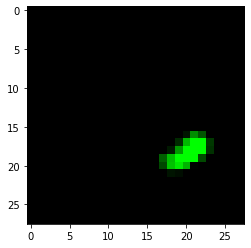

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


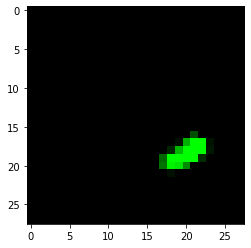

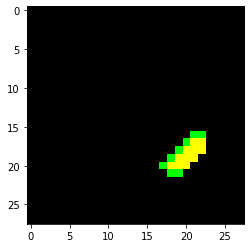

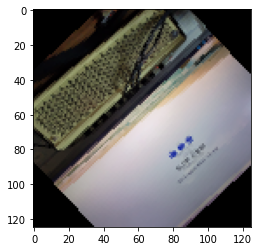

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


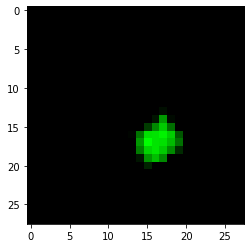

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


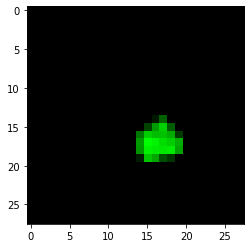

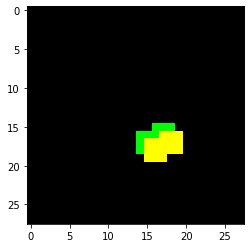

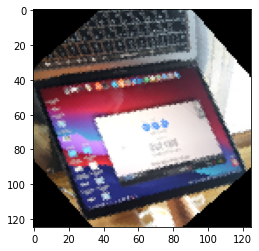

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


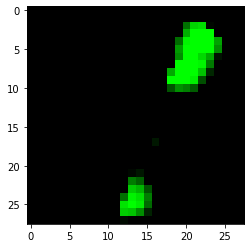

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


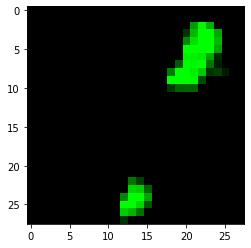

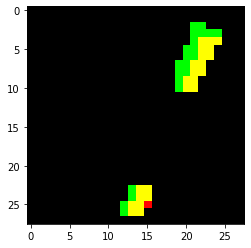

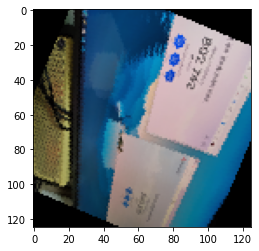

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


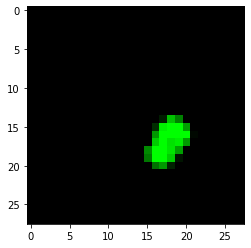

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


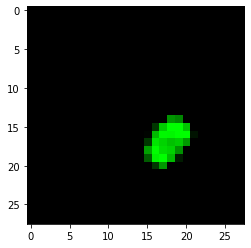

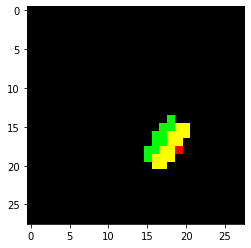

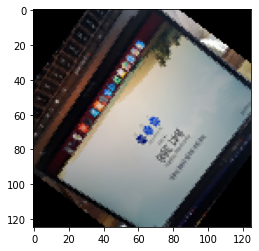

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


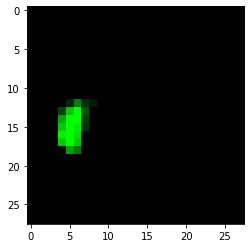

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


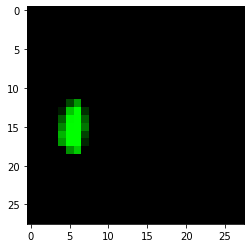

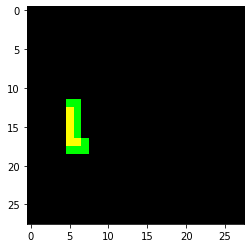

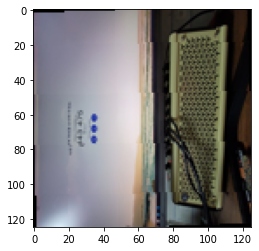

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


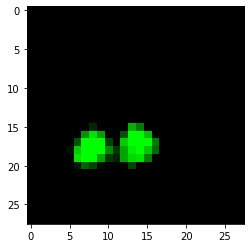

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


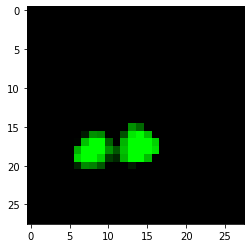

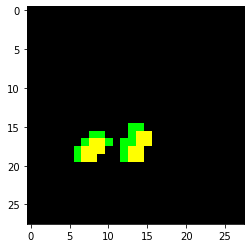

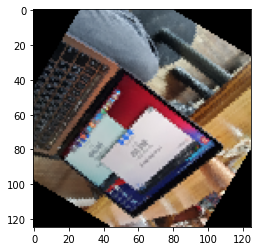

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


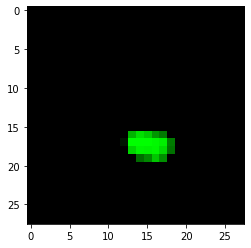

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


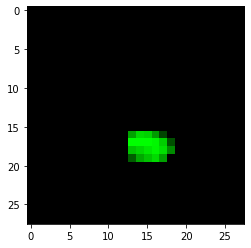

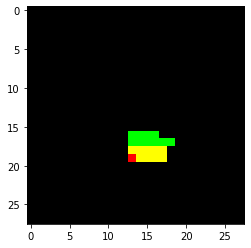

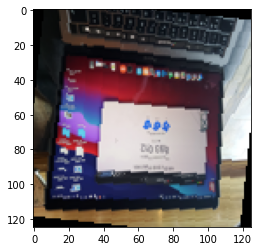

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


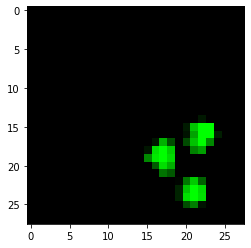

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


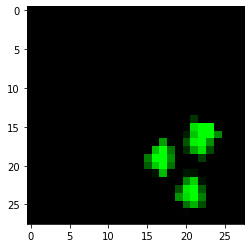

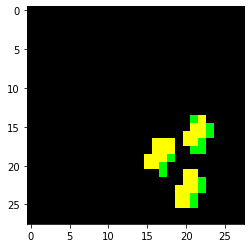

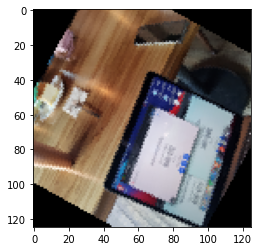

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


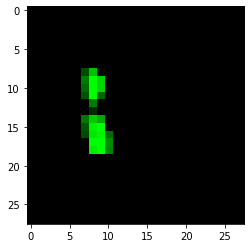

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


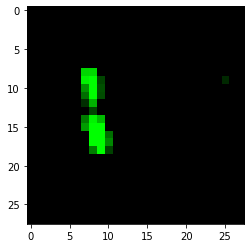

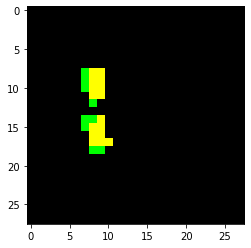

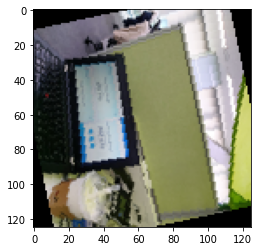

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


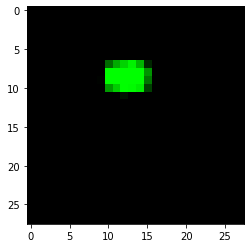

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


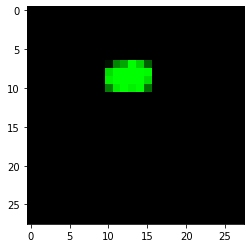

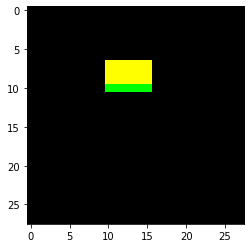

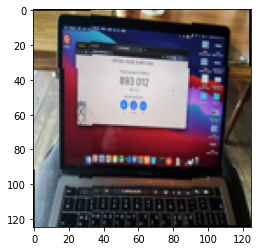

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


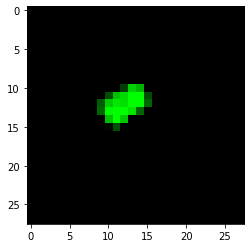

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


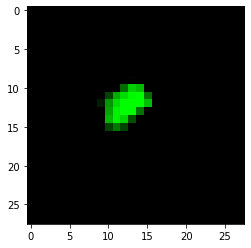

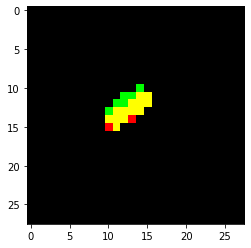

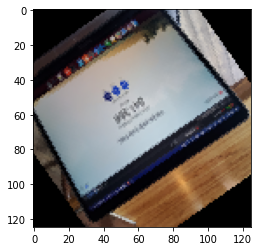

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


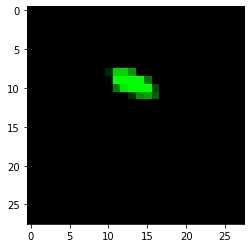

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


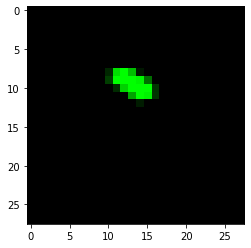

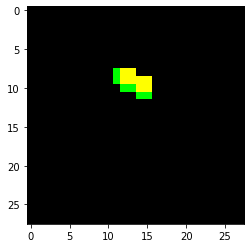

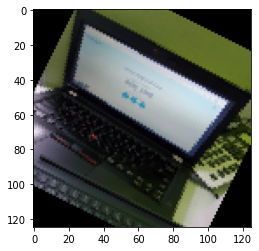

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


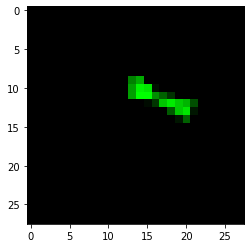

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


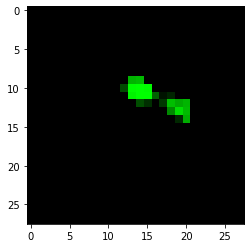

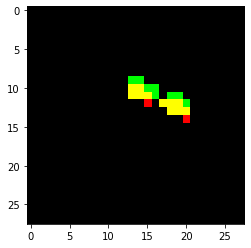

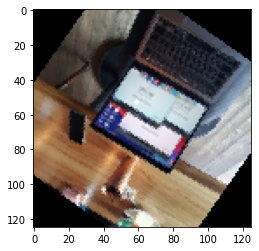

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


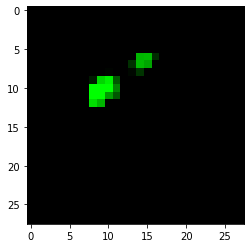

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


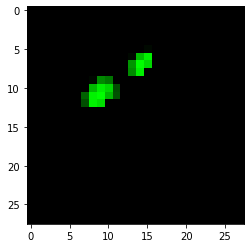

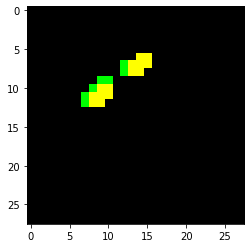

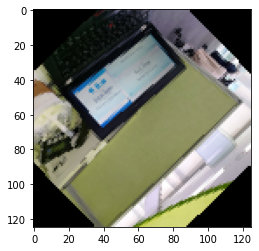

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


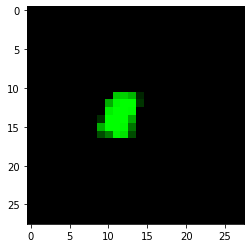

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


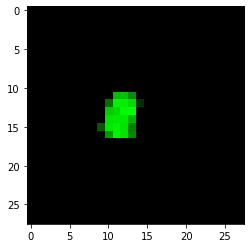

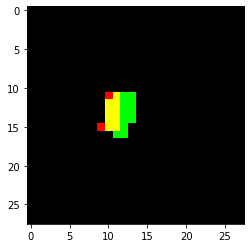

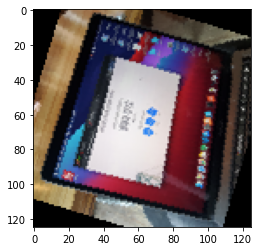

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


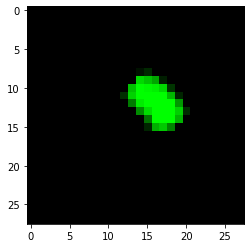

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


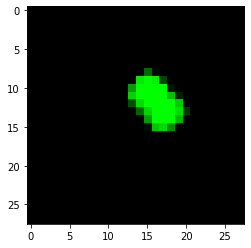

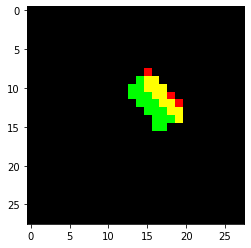

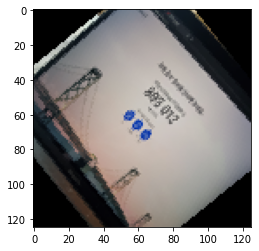

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


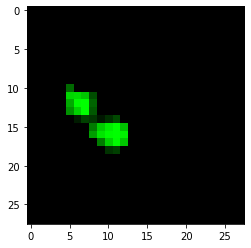

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


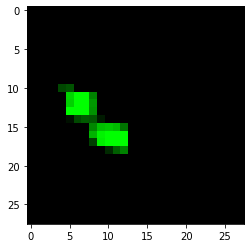

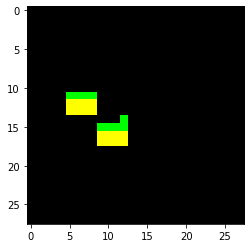

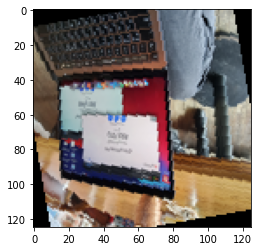

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


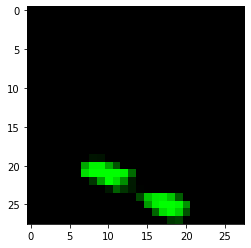

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


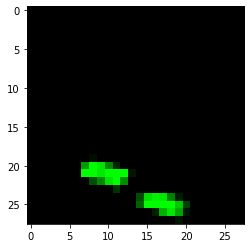

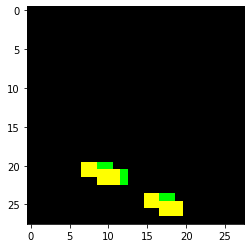

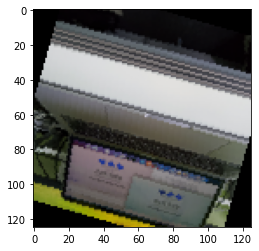

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


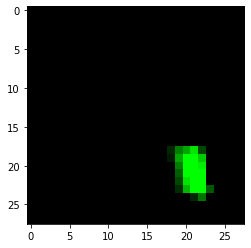

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


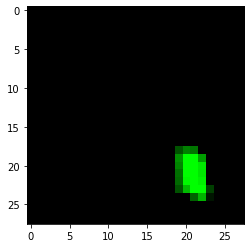

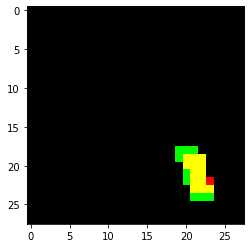

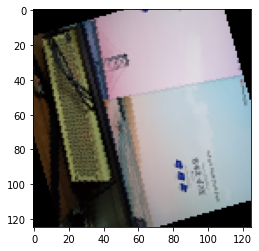

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


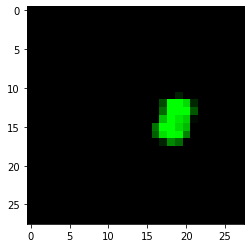

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


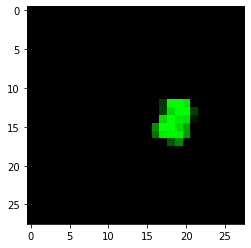

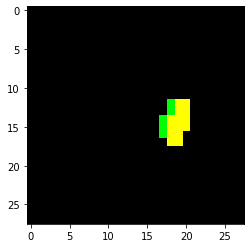

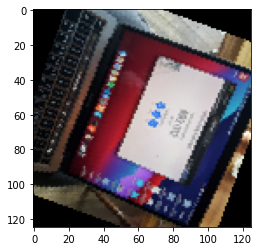

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


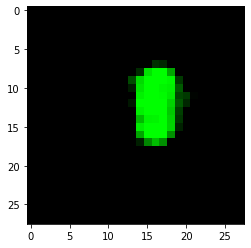

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


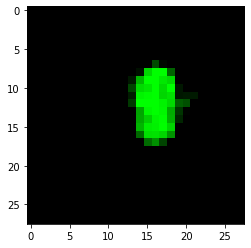

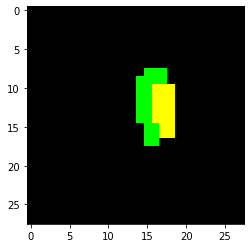

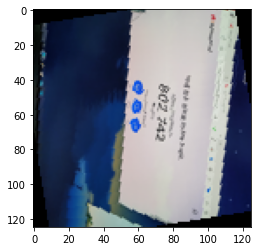

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


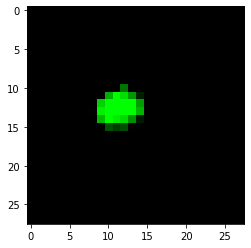

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


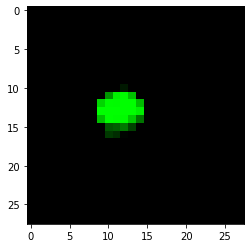

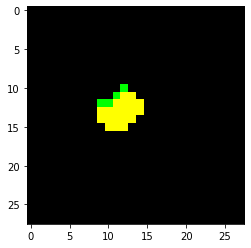

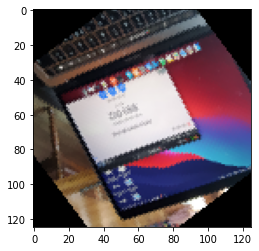

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


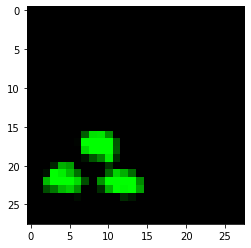

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


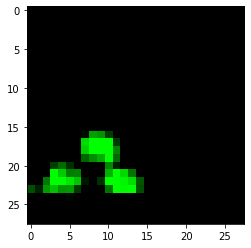

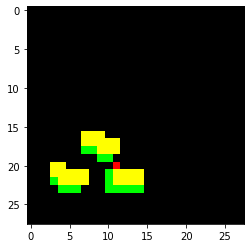

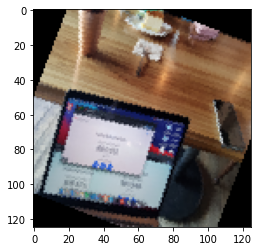

In [9]:

for i in range(23):
    plt.imshow(pre_trained_y[i])
    plt.show()
    plt.imshow(trained_y[i])
    plt.show()
    plt.imshow(real_y[i])
    plt.show()
    plt.imshow(x_test[i])
    plt.show()

In [ ]:
threshold = 0.35

In [ ]:
import numpy as np
def do_threshold(x):
  if x > threshold:
    return 1.0
  else:
    return 0.0

do_threshold = np.vectorize(do_threshold)

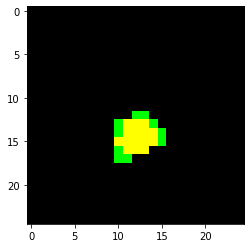

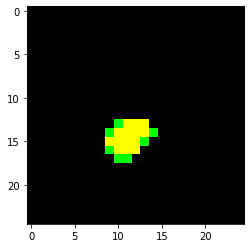

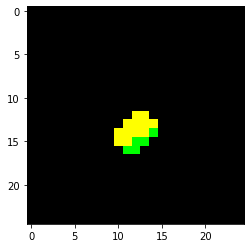

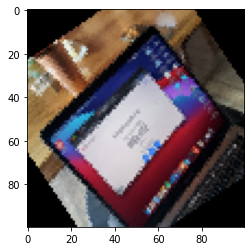

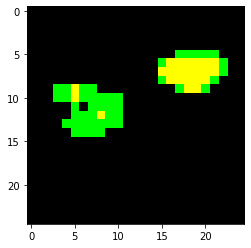

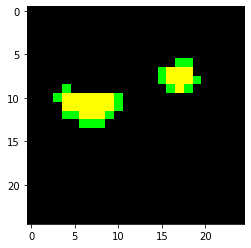

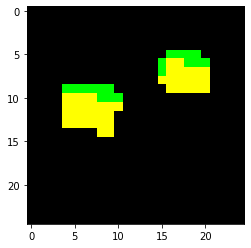

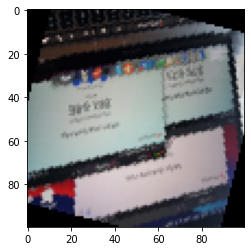

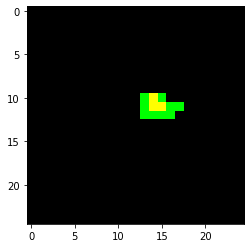

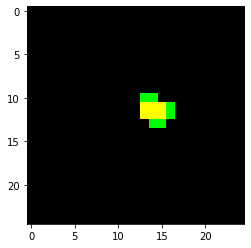

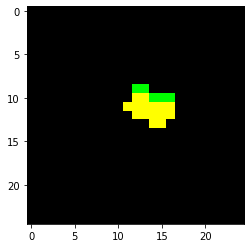

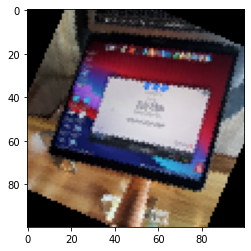

In [ ]:
for i in range(3):
    plt.imshow(do_threshold(pre_trained_y[i]), vmin=0., vmax=1.)
    plt.show()
    plt.imshow(do_threshold(trained_y[i]), vmin=0., vmax=1.)
    plt.show()
    plt.imshow(real_y[i], vmin=0., vmax=1.)
    plt.show()
    plt.imshow(x_test[i])
    plt.show()

camera


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


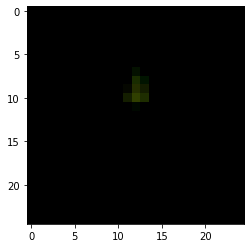

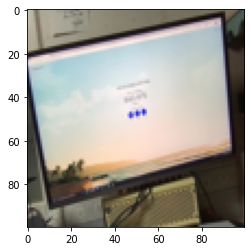

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import PIL.Image as pilimg

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  img = pilimg.open(filename).resize((100, 100))
  nd_img = np.array(img) / 255
  result = net.predict(nd_img.reshape(1,100,100,3))
  plt.imshow(np.insert(result, 2, 0, -1)[0])
  plt.show()
  plt.imshow(img)
  plt.show()

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# 코랩에서 안됨

import cv2


capture = cv2.VideoCapture(0)
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

retval = capture.read()

capture.release()

In [ ]:
retval

(False, None)

In [11]:
net.save("drive/MyDrive/my-net-v2")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: drive/MyDrive/my-net-v2/assets
